# 資料清理

In [1]:
import yfinance as yf
import pandas as pd
import ta
from ta import add_all_ta_features
from ta.momentum import StochasticOscillator

# 獲取台積電股票的歷史數據
df = yf.Ticker("2353.TW").history(period="max")

# 計算技術指標
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

df.info()


C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Chen1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5775 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5775 non-null   float64
 1   High                       5775 non-null   float64
 2   Low                        5775 non-null   float64
 3   Close                      5775 non-null   float64
 4   Volume                     5775 non-null   int64  
 5   Dividends                  5775 non-null   float64
 6   Stock Splits               5775 non-null   float64
 7   volume_adi                 235 non-null    float64
 8   volume_obv                 5775 non-null   int64  
 9   volume_cmf                 5711 non-null   float64
 10  volume_fi                  5762 non-null   float64
 11  volume_em                  5731 non-null   float64
 12  volume_sma_em              5436 non-null   float64
 13  

In [2]:
# 選擇要保留的指標
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']

# 刪除其他指標
df = df[selected_columns]

# 打印結果
print(df)

                                Open       High        Low      Close   
Date                                                                    
2000-01-04 00:00:00+08:00  19.490601  20.105415  19.285664  20.105415  \
2000-01-05 00:00:00+08:00  19.593069  20.105415  19.388132  20.105415   
2000-01-06 00:00:00+08:00  20.105415  21.336697  19.593069  20.105415   
2000-01-07 00:00:00+08:00  19.285661  19.695536  18.773315  18.773315   
2000-01-10 00:00:00+08:00  18.773322  19.183199  18.464262  18.669201   
...                              ...        ...        ...        ...   
2023-05-29 00:00:00+08:00  31.100000  31.100000  30.799999  31.049999   
2023-05-30 00:00:00+08:00  31.049999  31.200001  30.700001  31.000000   
2023-05-31 00:00:00+08:00  30.900000  30.900000  30.549999  30.850000   
2023-06-01 00:00:00+08:00  30.799999  30.900000  30.299999  30.900000   
2023-06-02 00:00:00+08:00  31.500000  33.950001  31.400000  33.950001   

                                Volume  trend_macd

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5775 entries, 2000-01-04 00:00:00+08:00 to 2023-06-02 00:00:00+08:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5775 non-null   float64
 1   High             5775 non-null   float64
 2   Low              5775 non-null   float64
 3   Close            5775 non-null   float64
 4   Volume           5775 non-null   int64  
 5   trend_macd_diff  5742 non-null   float64
 6   trend_ema_fast   5764 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 360.9 KB


In [4]:
# 將索引視為日期欄位
df['Date'] = df.index

# 將"Date"欄位移至第一欄
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast']]


# 計算KD值
KD = ta.momentum.StochasticOscillator(
    close=df['Close'],
    high=df['High'],
    low=df['Low'],
    window=14,
    smooth_window=3,
    fillna=False
)
df['KD'] = KD.stoch()  # 取得KD值的陣列

# 使用ta套件中的RSIIndicator指標計算RSI值
rsi = ta.momentum.RSIIndicator(
    close=df['Close'],
    window=14,
    fillna=False
).rsi()

# 將計算出的RSI值合併到原始DataFrame中
df['RSI'] = rsi

# 過濾出2022年到2023年2月的資料
start_date = '2022-01-01'
end_date = '2023-02-28'
dfmodel = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]




df = df.round(3) 

df = df.reset_index(drop=True)

print(dfmodel)

                                               Date       Open       High   
Date                                                                        
2022-01-03 00:00:00+08:00 2022-01-03 00:00:00+08:00  24.907797  24.948363  \
2022-01-04 00:00:00+08:00 2022-01-04 00:00:00+08:00  24.583266  24.704966   
2022-01-05 00:00:00+08:00 2022-01-05 00:00:00+08:00  24.542700  25.272896   
2022-01-06 00:00:00+08:00 2022-01-06 00:00:00+08:00  24.786099  24.988931   
2022-01-07 00:00:00+08:00 2022-01-07 00:00:00+08:00  24.786097  24.826664   
...                                             ...        ...        ...   
2023-02-20 00:00:00+08:00 2023-02-20 00:00:00+08:00  25.700001  25.700001   
2023-02-21 00:00:00+08:00 2023-02-21 00:00:00+08:00  25.650000  25.700001   
2023-02-22 00:00:00+08:00 2023-02-22 00:00:00+08:00  25.400000  25.799999   
2023-02-23 00:00:00+08:00 2023-02-23 00:00:00+08:00  25.799999  25.950001   
2023-02-24 00:00:00+08:00 2023-02-24 00:00:00+08:00  25.850000  25.850000   

In [5]:
dfmodel.tail(60)

,Date,Open,High,Low,Close,Volume,trend_macd_diff,trend_ema_fast,KD,RSI
Date,,,,,,,,,,
2022-11-22 00:00:00+08:00,2022-11-22 00:00:00+08:00,24.500000,24.500000,24.100000,24.350000,11286907,0.048408,24.246684,72.580636,62.251423
2022-11-23 00:00:00+08:00,2022-11-23 00:00:00+08:00,24.500000,24.950001,24.400000,24.750000,8310704,0.029713,24.324117,85.245882,66.219216
2022-11-24 00:00:00+08:00,2022-11-24 00:00:00+08:00,24.799999,25.000000,24.700001,24.850000,5511014,0.016865,24.405023,85.416660,67.148878
2022-11-25 00:00:00+08:00,2022-11-25 00:00:00+08:00,24.850000,25.000000,24.549999,24.549999,6559984,-0.017211,24.427327,56.666565,61.666014
2022-11-28 00:00:00+08:00,2022-11-28 00:00:00+08:00,24.450001,24.750000,24.299999,24.400000,6591582,-0.053193,24.423122,40.740673,59.068966
2022-11-29 00:00:00+08:00,2022-11-29 00:00:00+08:00,24.600000,24.650000,24.299999,24.600000,6191404,-0.066027,24.450334,55.555540,61.403034
2022-11-30 00:00:00+08:00,2022-11-30 00:00:00+08:00,24.549999,24.750000,24.450001,24.600000,12200803,-0.076291,24.473360,45.454530,61.403034
2022-12-01 00:00:00+08:00,2022-12-01 00:00:00+08:00,24.750000,25.100000,24.750000,24.750000,10229571,-0.074662,24.515920,59.090854,63.227004
2022-12-02 00:00:00+08:00,2022-12-02 00:00:00+08:00,24.750000,25.000000,24.750000,24.950001,6646374,-0.062301,24.582702,77.272735,65.563725


# 模型建構

### SVR

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta

# SVR
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.1, 0.2, 0.5]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for C in C_values:
        for epsilon in epsilon_values:
            model = SVR(C=C, epsilon=epsilon)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((C, epsilon, avg_score))
    
    # 選擇最佳參數
    best_C, best_epsilon, _ = min(scores, key=lambda x: x[2])
    
    model = SVR(C=best_C, epsilon=best_epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.1
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'C': best_C, 'epsilon': best_epsilon}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_SVR = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
model_SVR.fit(X, y)


最佳参数: {'ratio': 70, 'C': 10.0, 'epsilon': 0.1}
最佳相对误差: 0.0 %


SVR(C=10.0)

In [7]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_SVR = model_SVR.predict(input_data)

# 印出預測結果
print(predictions_SVR)

[22.86199512 22.56120196 22.60328964 22.84206629 23.33136892 23.11741825
 23.11151304 23.18870902 22.5726121  22.65950098 23.10135187 21.91126854
 22.55121089 22.76366728 22.80743216 23.50019991 23.34948744 22.48599593
 22.79972056 23.51385225 22.52602328 22.56965658 22.71642882 22.70303455
 23.63197162 23.43068303 24.00022275 23.86060302 23.58407551 22.84997313
 22.83711311 23.29126172 23.24695718 22.96657623 23.71234966 23.05103305
 22.78019917 23.83105447 23.61761119 23.45202919 23.65418516 22.77939339
 22.54489314 22.48730784 22.632533   22.63500898 22.72538906 22.52547836
 22.91232195 22.67548238 22.98248037 22.85522884 22.60478378 23.29866569
 23.15180906 22.65043791 23.31677538 23.75324486 23.72156169 22.93869762
 23.6414936  22.55881889]


In [8]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_SVR = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_SVR = selected_data_SVR[['Date']]

selected_data_SVR['predictions_SVR'] = predictions_SVR

# 打印结果
print(selected_data_SVR)




                          Date  predictions_SVR
5711 2023-03-01 00:00:00+08:00        22.861995
5712 2023-03-02 00:00:00+08:00        22.561202
5713 2023-03-03 00:00:00+08:00        22.603290
5714 2023-03-06 00:00:00+08:00        22.842066
5715 2023-03-07 00:00:00+08:00        23.331369
...                        ...              ...
5768 2023-05-25 00:00:00+08:00        23.753245
5769 2023-05-26 00:00:00+08:00        23.721562
5770 2023-05-29 00:00:00+08:00        22.938698
5771 2023-05-30 00:00:00+08:00        23.641494
5772 2023-05-31 00:00:00+08:00        22.558819

[62 rows x 2 columns]


In [9]:
# 找到最低值和最高值的索引
min_index = selected_data_SVR['predictions_SVR'].idxmin()
max_index = selected_data_SVR['predictions_SVR'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_SVR.loc[min_index, 'Date']
max_date = selected_data_SVR.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_SVR.loc[min_index, 'predictions_SVR']
max_value = selected_data_SVR.loc[max_index, 'predictions_SVR']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-16 00:00:00+08:00
最低值： 21.91126854278591
最高值日期： 2023-04-11 00:00:00+08:00
最高值： 24.00022274992324


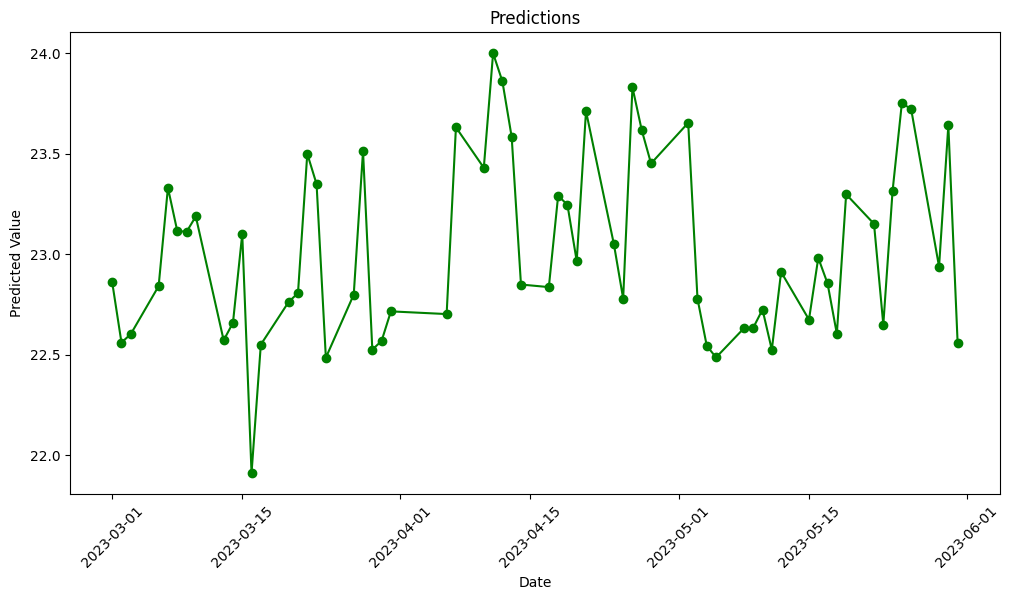

In [10]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()

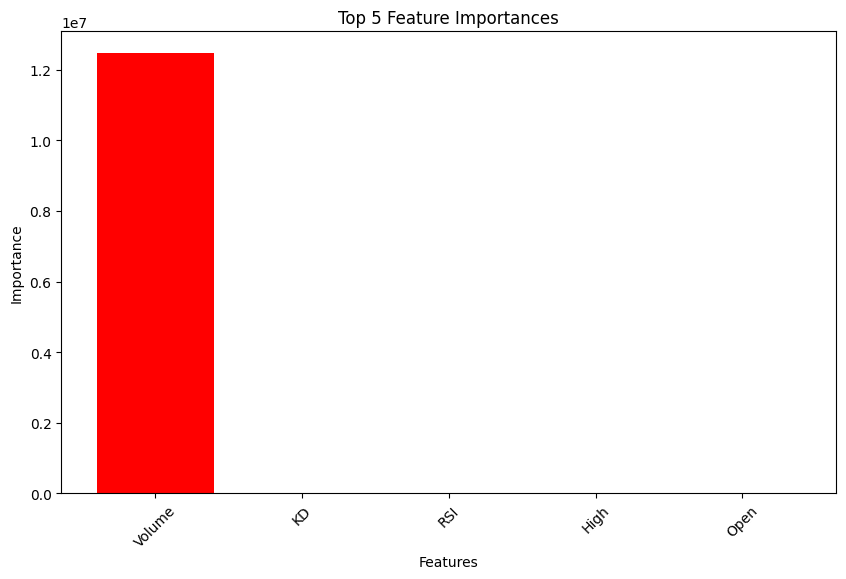

In [11]:
# 獲取支持向量（SV）的索引
support_vector_indices = model_SVR.support_

# 獲取支持向量對應的特徵
support_vectors = X.iloc[support_vector_indices]

# 計算支持向量的平均值作為特徵重要性
feature_importances = support_vectors.mean()

# 將特徵重要性排序
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# 取前N個重要特徵
top_n = 5
top_features = feature_importances_sorted.index[:top_n]
top_importances = feature_importances_sorted.values[:top_n]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


### randomforest

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime
from dateutil.relativedelta import relativedelta

# Random Forest
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(5, 100, 5)]
n_estimator_values = [i for i in range(100, 250, 50)]
max_depth_values = [i for i in range(1, 5)]
min_samples_leaf_values = [i for i in range(1, 5)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    for max_depth in max_depth_values:
        for min_samples_leaf in min_samples_leaf_values:
            for n_estimators in n_estimator_values:
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=2023)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                average_value = np.mean(y_test)
                relative_error = (mse / average_value) * 100
                if relative_error < best_relative_error:
                    best_relative_error = relative_error
                    best_params = {'ratio': ratio, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

print("最佳参数:", best_params)
print("最佳相对误差:", best_relative_error,'%')

# 將模型命名為 model
model_RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              min_samples_leaf=best_params['min_samples_leaf'],
                              random_state=2023)
model_RF.fit(X, y)




最佳参数: {'ratio': 95, 'n_estimators': 150, 'max_depth': 4, 'min_samples_leaf': 1}
最佳相对误差: 0.40526746192851787 %


RandomForestRegressor(max_depth=4, n_estimators=150, random_state=2023)

In [13]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-15':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_RF = model_RF.predict(input_data)

# 印出預測結果
print(predictions_RF)

[24.98310773 24.60855372 24.3941084  24.73513545 24.89993775 24.57376714
 24.46303157 24.56959701 24.57226368 24.74178525 24.93698514 23.99021711
 23.43373044 23.34963082 23.57412527 23.57839982 23.56796454 23.05394682
 23.38754115 23.27977974 23.04242114 23.03343991 22.70262393 22.84659324
 23.06805217 23.114735   23.2303109  23.26883127 23.26581836 23.41901791
 23.5713226  23.57574158 23.65115588 24.00015413 24.09063465 24.43309769
 24.03667006 24.09601357 24.02186829 24.03911208 24.12063644 24.52424301
 24.88919535 24.92553501 24.92725723 24.94088851 24.68167372 24.93746475
 25.19526515 25.39325858 25.54270172 25.21843791 25.33047071 25.38748851
 25.42221575 25.65981499 25.69977702 25.69978629 25.6655613  25.68128073
 25.70934184 25.41525001]


In [14]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_RF = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_RF = selected_data_RF[['Date']]

selected_data_RF['predictions_RF'] = predictions_RF

# 打印结果
print(selected_data_RF)


                          Date  predictions_RF
5711 2023-03-01 00:00:00+08:00       24.983108
5712 2023-03-02 00:00:00+08:00       24.608554
5713 2023-03-03 00:00:00+08:00       24.394108
5714 2023-03-06 00:00:00+08:00       24.735135
5715 2023-03-07 00:00:00+08:00       24.899938
...                        ...             ...
5768 2023-05-25 00:00:00+08:00       25.699786
5769 2023-05-26 00:00:00+08:00       25.665561
5770 2023-05-29 00:00:00+08:00       25.681281
5771 2023-05-30 00:00:00+08:00       25.709342
5772 2023-05-31 00:00:00+08:00       25.415250

[62 rows x 2 columns]


In [15]:
# 找到最低值和最高值的索引
min_index = selected_data_RF['predictions_RF'].idxmin()
max_index = selected_data_RF['predictions_RF'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_RF.loc[min_index, 'Date']
max_date = selected_data_RF.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_RF.loc[min_index, 'predictions_RF']
max_value = selected_data_RF.loc[max_index, 'predictions_RF']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)

最低值日期： 2023-03-31 00:00:00+08:00
最低值： 22.70262393432748
最高值日期： 2023-05-30 00:00:00+08:00
最高值： 25.709341844879575


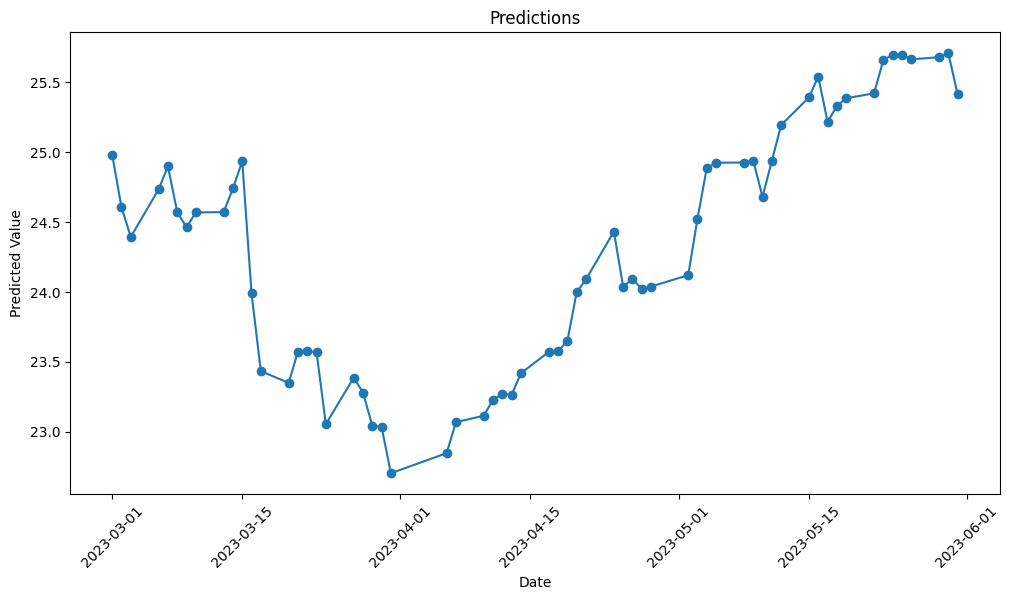

In [16]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



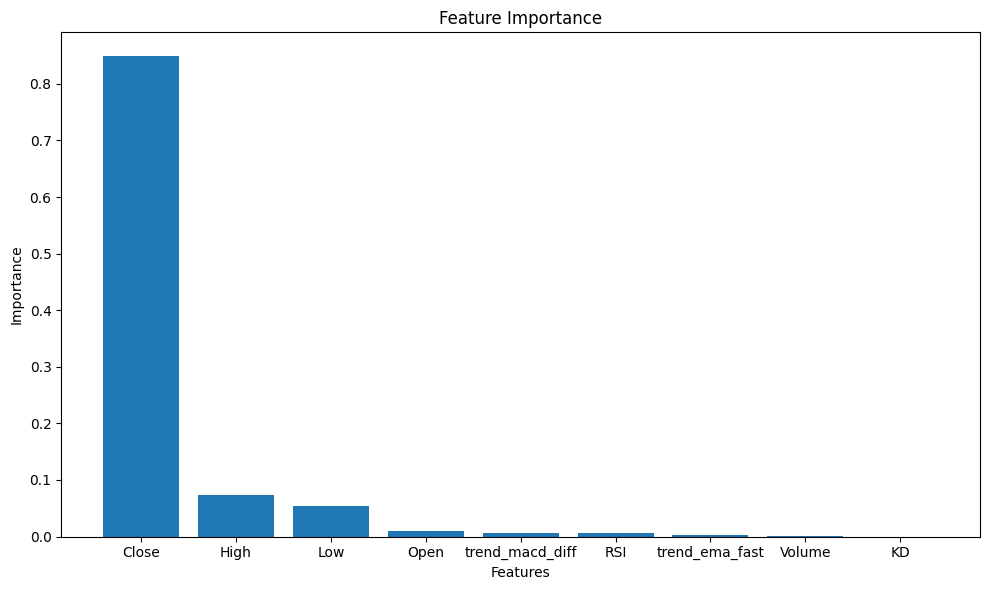

In [17]:
#看那些特徵比較重要，然後輸出前n重要的特徵

feature_importances = model_RF.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# 繪製長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names,)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### XGBoost

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from dateutil.relativedelta import relativedelta


# XGBoost
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'trend_macd_diff', 'trend_ema_fast', 'KD', 'RSI']
X = dfmodel[features].shift(-60).dropna()

# Shift the target variable 'Close' 60 trading days ahead
y = dfmodel['Close'].shift(-60).dropna()

ratio_values = [i for i in range(20, 100, 10)]

best_relative_error = float('inf')
best_params = {}

for ratio in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio/100, random_state=2023, shuffle=False)
    
    # 使用交叉驗證來評估模型性能
    scores = []
    for max_depth in range(3, 7):
        for learning_rate in [0.1, 0.01]:
            model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate)
            # 使用交叉驗證計算性能指標
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
            avg_score = np.mean(cv_scores)
            scores.append((max_depth, learning_rate, avg_score))
    
    # 選擇最佳參數
    best_max_depth, best_learning_rate, _ = min(scores, key=lambda x: x[2])
    
    model = xgb.XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    epsilon = 0.00001
    relative_error = np.mean(np.abs(y_test - y_pred) <= epsilon) * 100
    
    if relative_error < best_relative_error:
        best_relative_error = relative_error
        best_params = {'ratio': ratio, 'max_depth': best_max_depth, 'learning_rate': best_learning_rate}

print("最佳參數:", best_params)
print("最佳相對誤差:", best_relative_error, '%')

# 使用最佳參數進行訓練
model_XG = xgb.XGBRegressor(max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'])
model_XG.fit(X, y)

最佳參數: {'ratio': 20, 'max_depth': 3, 'learning_rate': 0.01}
最佳相對誤差: 0.0 %


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [19]:
# 將2023年3月到5月之前60天的資料作為輸入值
input_data = dfmodel.loc['2022-11-18':'2023-02-24'][features].tail(62)

# 使用模型進行預測
predictions_XG = model_XG.predict(input_data)

# 印出預測結果
print(predictions_XG)

[15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 14.97885   14.925176  15.066207  15.066207  15.0488405 14.707745
 14.961209  14.888394  14.724514  14.707745  14.500705  14.586004
 14.759636  14.798445  14.855398  14.888394  14.888394  14.97885
 15.0488405 15.0837755 15.182689  15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855 15.2589855
 15.2589855 15.2589855]


In [20]:
# 选择3月到5月的数据
start_date_predict = '2023-03-01'
end_date_predict = '2023-05-31'
selected_data_XG = df[(df['Date'] >= start_date_predict) & (df['Date'] <= end_date_predict)]

# 只保留日期索引列
selected_data_XG = selected_data_XG[['Date']]

selected_data_XG['predictions_XG'] = predictions_XG

# 打印结果
print(selected_data_XG)




                          Date  predictions_XG
5711 2023-03-01 00:00:00+08:00       15.258986
5712 2023-03-02 00:00:00+08:00       15.258986
5713 2023-03-03 00:00:00+08:00       15.258986
5714 2023-03-06 00:00:00+08:00       15.258986
5715 2023-03-07 00:00:00+08:00       15.258986
...                        ...             ...
5768 2023-05-25 00:00:00+08:00       15.258986
5769 2023-05-26 00:00:00+08:00       15.258986
5770 2023-05-29 00:00:00+08:00       15.258986
5771 2023-05-30 00:00:00+08:00       15.258986
5772 2023-05-31 00:00:00+08:00       15.258986

[62 rows x 2 columns]


In [21]:
# 找到最低值和最高值的索引
min_index = selected_data_XG['predictions_XG'].idxmin()
max_index = selected_data_XG['predictions_XG'].idxmax()

# 獲取最低值和最高值的日期
min_date = selected_data_XG.loc[min_index, 'Date']
max_date = selected_data_XG.loc[max_index, 'Date']

# 獲取最低值和最高值的實際數值
min_value = selected_data_XG.loc[min_index, 'predictions_XG']
max_value = selected_data_XG.loc[max_index, 'predictions_XG']

print("最低值日期：", min_date)
print("最低值：", min_value)
print("最高值日期：", max_date)
print("最高值：", max_value)


最低值日期： 2023-03-31 00:00:00+08:00
最低值： 14.500705
最高值日期： 2023-03-01 00:00:00+08:00
最高值： 15.2589855


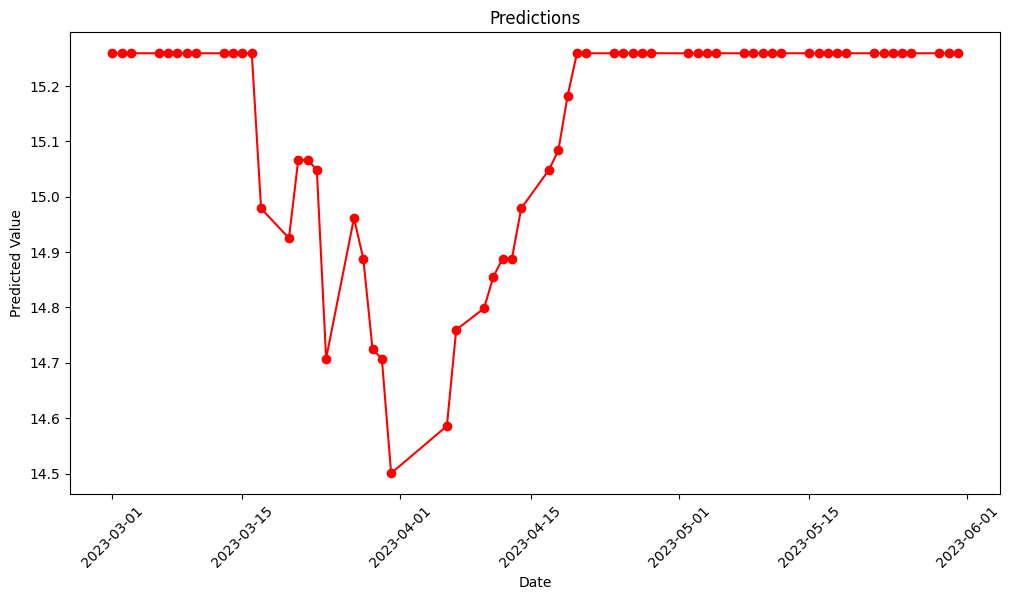

In [22]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red')


# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()



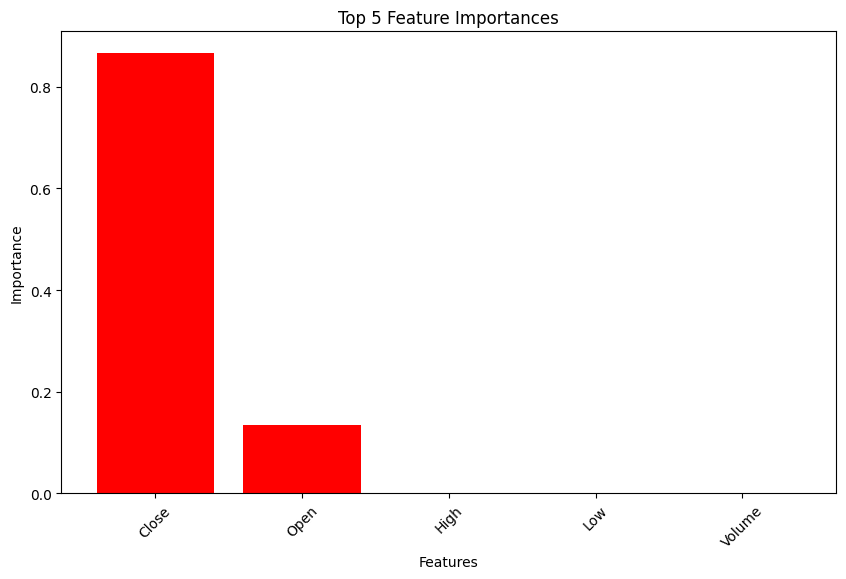

In [23]:
# 獲取特徵重要性
feature_importances = model_XG.feature_importances_

# 獲取特徵名稱
feature_names = X.columns

# 將特徵重要性與特徵名稱進行配對並排序
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 取前N個重要特徵
top_n = 5
top_features = [f for f, _ in feature_importances_sorted[:top_n]]
top_importances = [imp for _, imp in feature_importances_sorted[:top_n]]

# 可視化為長條圖
plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances, color='red')
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


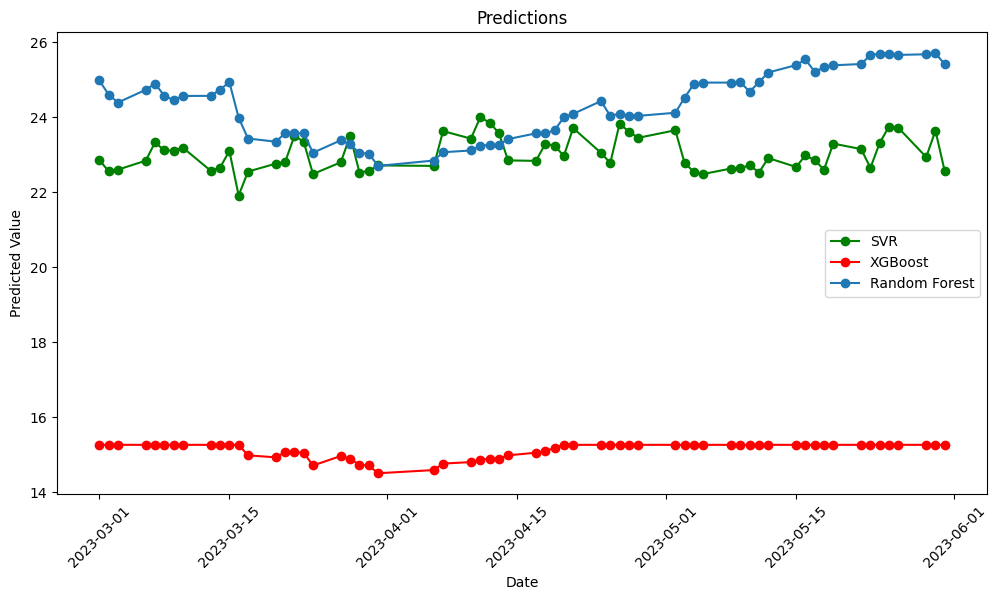

In [24]:
# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制折线图
plt.plot(selected_data_SVR['Date'], selected_data_SVR['predictions_SVR'], marker='o', color='green', label='SVR')
plt.plot(selected_data_XG['Date'], selected_data_XG['predictions_XG'], marker='o', color='red', label='XGBoost')
plt.plot(selected_data_RF['Date'], selected_data_RF['predictions_RF'], marker='o', label='Random Forest')

# 设置标题和坐标轴标签
plt.title('Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')

# 设置图例
plt.legend()

# 设置x轴刻度的显示方式
plt.xticks(rotation=45)

# 显示图形
plt.show()
